# Random Forest Regressor Model

## Import dependency and Load Dataset

In [1]:
# Import the dependency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
crypto_df = pd.read_csv("resources/train.csv")
crypto_df.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,NaN
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


In [3]:
asset_df = pd.read_csv('resources/asset_details.csv')
asset_df.sort_values(by='Asset_ID',ascending=True)

,Asset_ID,Weight,Asset_Name
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
0,2,2.397895,Bitcoin Cash
10,3,4.406719,Cardano
13,4,3.555348,Dogecoin
3,5,1.386294,EOS.IO
5,6,5.894403,Ethereum
4,7,2.079442,Ethereum Classic
11,8,1.098612,IOTA
6,9,2.397895,Litecoin


## Cleaning the data

In [4]:
# Check for missing data
crypto_df.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236806 entries, 0 to 24236805
Data columns (total 10 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   timestamp  24236806 non-null  int64  
 1   Asset_ID   24236806 non-null  int64  
 2   Count      24236806 non-null  float64
 3   Open       24236806 non-null  float64
 4   High       24236806 non-null  float64
 5   Low        24236806 non-null  float64
 6   Close      24236806 non-null  float64
 7   Volume     24236806 non-null  float64
 8   VWAP       24236797 non-null  float64
 9   Target     23486468 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.8 GB


In [5]:
# Check missing values in each column
crypto_df.isnull().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [6]:
# Replace NaN values with zeros in Target column
crypto_df["Target"] = crypto_df["Target"].fillna(0)
crypto_df.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,0.000000
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


In [7]:
# Show all rows with NaN values in VWAP column
crypto_df[crypto_df["VWAP"].isnull()]

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
15004269,1592173560,10,2.0,501.00,501.00,501.00,501.00,0.0,NaN,0.000000
15004283,1592173620,10,4.0,501.00,501.00,501.00,501.00,0.0,NaN,0.000000
15059232,1592426160,10,2.0,529.77,529.77,529.77,529.77,0.0,NaN,0.007356
15143187,1592823720,10,2.0,503.60,503.60,503.60,503.60,0.0,NaN,-0.005672
15183088,1593008940,10,2.0,484.16,484.16,484.16,484.16,0.0,NaN,-0.004281
15184216,1593013920,10,2.0,480.00,480.00,480.00,480.00,0.0,NaN,0.000000
15184243,1593014040,10,2.0,480.00,480.00,480.00,480.00,0.0,NaN,0.000000
15184309,1593014340,10,6.0,479.07,479.07,479.07,479.07,0.0,NaN,0.000000
15184778,1593016440,10,4.0,478.00,478.00,475.00,478.00,0.0,NaN,0.000000


In [8]:
# Fill time gaps with reindex() method
BNB = crypto_df[crypto_df["Asset_ID"]==0].set_index("timestamp")
BNB = BNB.reindex(range(BNB.index[0],BNB.index[-1]+60,60),method='pad')
(BNB.index[1:]-BNB.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [9]:
BTC = crypto_df[crypto_df["Asset_ID"]==1].set_index("timestamp")
BTC = BTC.reindex(range(BTC.index[0],BTC.index[-1]+60,60),method='pad')
(BTC.index[1:]-BTC.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [10]:
BCH = crypto_df[crypto_df["Asset_ID"]==2].set_index("timestamp")
BCH = BCH.reindex(range(BCH.index[0],BCH.index[-1]+60,60),method='pad')
(BCH.index[1:]-BCH.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [11]:
ADA = crypto_df[crypto_df["Asset_ID"]==3].set_index("timestamp")
ADA = ADA.reindex(range(ADA.index[0],ADA.index[-1]+60,60),method='pad')
(ADA.index[1:]-ADA.index[:-1]).value_counts()

60    1803769
Name: timestamp, dtype: int64

In [12]:
DOGE = crypto_df[crypto_df["Asset_ID"]==4].set_index("timestamp")
DOGE = DOGE.reindex(range(DOGE.index[0],DOGE.index[-1]+60,60),method='pad')
(DOGE.index[1:]-DOGE.index[:-1]).value_counts()

60    1285046
Name: timestamp, dtype: int64

In [13]:
EOS = crypto_df[crypto_df["Asset_ID"]==5].set_index("timestamp")
EOS = EOS.reindex(range(EOS.index[0],EOS.index[-1]+60,60),method='pad')
(EOS.index[1:]-EOS.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [14]:
ETH = crypto_df[crypto_df["Asset_ID"]==6].set_index("timestamp")
ETH = ETH.reindex(range(ETH.index[0],ETH.index[-1]+60,60),method='pad')
(ETH.index[1:]-ETH.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [15]:
ETC = crypto_df[crypto_df["Asset_ID"]==7].set_index("timestamp")
ETC = ETC.reindex(range(ETC.index[0],ETC.index[-1]+60,60),method='pad')
(ETC.index[1:]-ETC.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [16]:
MIOTA = crypto_df[crypto_df["Asset_ID"]==8].set_index("timestamp")
MIOTA = MIOTA.reindex(range(MIOTA.index[0],MIOTA.index[-1]+60,60),method='pad')
(MIOTA.index[1:]-MIOTA.index[:-1]).value_counts()

60    1772153
Name: timestamp, dtype: int64

In [17]:
LTC = crypto_df[crypto_df["Asset_ID"]==9].set_index("timestamp")
LTC = LTC.reindex(range(LTC.index[0],LTC.index[-1]+60,60),method='pad')
(LTC.index[1:]-LTC.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [18]:
MKR = crypto_df[crypto_df["Asset_ID"]==10].set_index("timestamp")
MKR = MKR.reindex(range(MKR.index[0],MKR.index[-1]+60,60),method='pad')
(MKR.index[1:]-MKR.index[:-1]).value_counts()

60    1770279
Name: timestamp, dtype: int64

In [19]:
XMR = crypto_df[crypto_df["Asset_ID"]==11].set_index("timestamp")
XMR = XMR.reindex(range(XMR.index[0],XMR.index[-1]+60,60),method='pad')
(XMR.index[1:]-XMR.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [20]:
XLM = crypto_df[crypto_df["Asset_ID"]==12].set_index("timestamp")
XLM = XLM.reindex(range(XLM.index[0],XLM.index[-1]+60,60),method='pad')
(XLM.index[1:]-XLM.index[:-1]).value_counts()

60    1889287
Name: timestamp, dtype: int64

In [21]:
TRX = crypto_df[crypto_df["Asset_ID"]==13].set_index("timestamp")
TRX = TRX.reindex(range(TRX.index[0],TRX.index[-1]+60,60),method='pad')
(TRX.index[1:]-TRX.index[:-1]).value_counts()

60    1903823
Name: timestamp, dtype: int64

In [22]:
# Convert minute data to daily data for each cryptocurrency
BNB.reset_index(inplace=True)
BNB["timestamp"]=BNB["timestamp"].apply(lambda x: x-60)
BNB["Date"]=pd.to_datetime(BNB["timestamp"], unit='s')
# Create a new daily df for Binance Coin
BNB_daily_df=pd.DataFrame(columns=["Asset_ID", "Open", "Close", "High", "Low", "Volume", "VWAP"])
BNB_daily_df['High']=BNB.groupby(pd.Grouper(freq='D', key='Date')).max()['High']
BNB_daily_df['Low']=BNB.groupby(pd.Grouper(freq='D', key='Date')).max()['Low']
BNB_daily_df['Open']=BNB.Open[0:-1:24*60].values
BNB_daily_df['Close']=BNB.Close[24*60-1:len(BNB):24*60].values
BNB_daily_df['Asset_ID']=BNB.Asset_ID[0:-1:24*60].values
BNB_daily_df['Volume']=BNB.groupby(pd.Grouper(freq='D', key='Date')).sum()['Volume']
BNB_daily_df['VWAP']=BNB.groupby(pd.Grouper(freq='D', key='Date')).sum()['VWAP']

# Convert minute data to daily data
BTC.reset_index(inplace=True)
BTC["timestamp"]=BTC["timestamp"].apply(lambda x: x-60)
BTC["Date"]=pd.to_datetime(BTC["timestamp"], unit='s')
# Create a new daily df for Bitcoin
BTC_daily_df=pd.DataFrame(columns=["Asset_ID", "Open", "Close", "High", "Low", "Volume", "VWAP"])
BTC_daily_df['High']=BTC.groupby(pd.Grouper(freq='D', key='Date')).max()['High']
BTC_daily_df['Low']=BTC.groupby(pd.Grouper(freq='D', key='Date')).max()['Low']
BTC_daily_df['Open']=BTC.Open[0:-1:24*60].values
BTC_daily_df['Close']=BTC.Close[24*60-1:len(BTC):24*60].values
BTC_daily_df['Asset_ID']=BTC.Asset_ID[0:-1:24*60].values
BTC_daily_df['Volume']=BTC.groupby(pd.Grouper(freq='D', key='Date')).sum()['Volume']
BTC_daily_df['VWAP']=BTC.groupby(pd.Grouper(freq='D', key='Date')).sum()['VWAP']

# Convert minute data to daily data
EOS.reset_index(inplace=True)
EOS["timestamp"]=EOS["timestamp"].apply(lambda x: x-60)
EOS["Date"]=pd.to_datetime(EOS["timestamp"], unit='s')
# Create a new daily df for EOS.io
EOS_daily_df=pd.DataFrame(columns=["Asset_ID", "Open", "Close", "High", "Low", "Volume", "VWAP"])
EOS_daily_df['High']=EOS.groupby(pd.Grouper(freq='D', key='Date')).max()['High']
EOS_daily_df['Low']=EOS.groupby(pd.Grouper(freq='D', key='Date')).max()['Low']
EOS_daily_df['Open']=EOS.Open[0:-1:24*60].values
EOS_daily_df['Close']=EOS.Close[24*60-1:len(EOS):24*60].values
EOS_daily_df['Asset_ID']=EOS.Asset_ID[0:-1:24*60].values
EOS_daily_df['Volume']=EOS.groupby(pd.Grouper(freq='D', key='Date')).sum()['Volume']
EOS_daily_df['VWAP']=EOS.groupby(pd.Grouper(freq='D', key='Date')).sum()['VWAP']

# Convert minute data to daily data
ETH.reset_index(inplace=True)
ETH["timestamp"]=ETH["timestamp"].apply(lambda x: x-60)
ETH["Date"]=pd.to_datetime(ETH["timestamp"], unit='s')
# Create a new daily df for Bitcoin
ETH_daily_df=pd.DataFrame(columns=["Asset_ID", "Open", "Close", "High", "Low", "Volume", "VWAP"])
ETH_daily_df['High']=ETH.groupby(pd.Grouper(freq='D', key='Date')).max()['High']
ETH_daily_df['Low']=ETH.groupby(pd.Grouper(freq='D', key='Date')).max()['Low']
ETH_daily_df['Open']=ETH.Open[0:-1:24*60].values
ETH_daily_df['Close']=ETH.Close[24*60-1:len(ETH):24*60].values
ETH_daily_df['Asset_ID']=ETH.Asset_ID[0:-1:24*60].values
ETH_daily_df['Volume']=ETH.groupby(pd.Grouper(freq='D', key='Date')).sum()['Volume']
ETH_daily_df['VWAP']=ETH.groupby(pd.Grouper(freq='D', key='Date')).sum()['VWAP']

# Convert minute data to daily data
LTC.reset_index(inplace=True)
LTC["timestamp"]=LTC["timestamp"].apply(lambda x: x-60)
LTC["Date"]=pd.to_datetime(LTC["timestamp"], unit='s')
# Create a new daily df for Bitcoin
LTC_daily_df=pd.DataFrame(columns=["Asset_ID", "Open", "Close", "High", "Low", "Volume", "VWAP"])
LTC_daily_df['High']=LTC.groupby(pd.Grouper(freq='D', key='Date')).max()['High']
LTC_daily_df['Low']=LTC.groupby(pd.Grouper(freq='D', key='Date')).max()['Low']
LTC_daily_df['Open']=LTC.Open[0:-1:24*60].values
LTC_daily_df['Close']=LTC.Close[24*60-1:len(LTC):24*60].values
LTC_daily_df['Asset_ID']=LTC.Asset_ID[0:-1:24*60].values
LTC_daily_df['Volume']=LTC.groupby(pd.Grouper(freq='D', key='Date')).sum()['Volume']
LTC_daily_df['VWAP']=LTC.groupby(pd.Grouper(freq='D', key='Date')).sum()['VWAP']

# Convert minute data to daily data
XMR.reset_index(inplace=True)
XMR["timestamp"]=XMR["timestamp"].apply(lambda x: x-60)
XMR["Date"]=pd.to_datetime(XMR["timestamp"], unit='s')
# Create a new daily df for Bitcoin
XMR_daily_df=pd.DataFrame(columns=["Asset_ID", "Open", "Close", "High", "Low", "Volume", "VWAP"])
XMR_daily_df['High']=XMR.groupby(pd.Grouper(freq='D', key='Date')).max()['High']
XMR_daily_df['Low']=XMR.groupby(pd.Grouper(freq='D', key='Date')).max()['Low']
XMR_daily_df['Open']=XMR.Open[0:-1:24*60].values
XMR_daily_df['Close']=XMR.Close[24*60-1:len(XMR):24*60].values
XMR_daily_df['Asset_ID']=XMR.Asset_ID[0:-1:24*60].values
XMR_daily_df['Volume']=XMR.groupby(pd.Grouper(freq='D', key='Date')).sum()['Volume']
XMR_daily_df['VWAP']=XMR.groupby(pd.Grouper(freq='D', key='Date')).sum()['VWAP']

In [23]:
# Check crypto daily df
BNB_daily_df.head()

,Asset_ID,Open,Close,High,Low,Volume,VWAP
Date,,,,,,,
2018-01-01,0,8.530,8.4381,8.7000,8.6117,663279.30,11906.978515
2018-01-02,0,8.463,8.6996,9.1133,9.1000,1267257.37,12274.265369
2018-01-03,0,8.711,9.2880,9.4697,9.4400,945805.40,12535.542658
2018-01-04,0,9.288,9.1215,9.6511,9.4369,986443.42,13030.487848
2018-01-05,0,9.135,15.0045,16.8172,16.7200,2767053.79,17083.019644


In [25]:
# Merge the clean dataset together
frames = [BNB_daily_df, BTC_daily_df, EOS_daily_df, ETH_daily_df, LTC_daily_df, XMR_daily_df]
crypto_con_df = pd.concat(frames)

# Use the index to sort the values
crypto_con_df = crypto_con_df.sort_index()

# Reset index
crypto_con_df.reset_index(inplace=True)

# Merge crypto_con_df with df contains asset details
crypto_daily_df = crypto_con_df.merge(asset_df, how='left', on='Asset_ID')
crypto_daily_df = crypto_daily_df.reindex(columns=['Date','Asset_ID','Asset_Name','Weight','Open','High','Low','Close','Volume','VWAP'])
crypto_daily_df.head(10)

,Date,Asset_ID,Asset_Name,Weight,Open,High,Low,Close,Volume,VWAP
0,2018-01-01,0,Binance Coin,4.304065,8.5300,8.7000,8.6117,8.4381,6.632793e+05,1.190698e+04
1,2018-01-01,9,Litecoin,2.397895,225.3300,237.7700,231.8400,223.9000,4.791826e+05,3.225275e+05
2,2018-01-01,6,Ethereum,5.894403,738.3025,772.9800,760.8800,757.3900,2.739851e+05,1.073668e+06
3,2018-01-01,5,EOS.IO,1.386294,7.6596,7.9500,7.9499,7.6401,1.833038e+06,1.100531e+04
4,2018-01-01,1,Bitcoin,6.779922,13835.1940,14442.9000,13788.0000,13468.6980,5.788981e+04,1.935317e+07
5,2018-01-01,11,Monero,1.609438,329.0900,348.3000,348.1900,340.3450,2.870520e+04,4.762888e+05
6,2018-01-02,9,Litecoin,2.397895,224.3840,265.0000,256.2100,251.2860,1.180959e+06,3.532584e+05
7,2018-01-02,6,Ethereum,5.894403,757.7250,899.5000,873.3500,859.6750,8.520293e+05,1.220000e+06
8,2018-01-02,1,Bitcoin,6.779922,13459.6060,15500.0000,15105.0000,14743.4240,1.055412e+05,1.999519e+07
9,2018-01-02,0,Binance Coin,4.304065,8.4630,9.1133,9.1000,8.6996,1.267257e+06,1.227427e+04


In [28]:
# Export data into a CSV
output_data_file = "resources/crypto_daily_close.csv"
crypto_daily_df.to_csv(output_data_file, index=False)

## Overview of the Data

In [29]:
# Check the shape
print(f'Shape of Dataframe {crypto_daily_df.shape}')

Shape of Dataframe (8154, 10)


In [31]:
new_BNB = crypto_daily_df[crypto_daily_df["Asset_ID"]==0].set_index("Date")
new_BTC = crypto_daily_df[crypto_daily_df["Asset_ID"]==1].set_index("Date")
new_EOS = crypto_daily_df[crypto_daily_df["Asset_ID"]==5].set_index("Date")
new_ETH = crypto_daily_df[crypto_daily_df["Asset_ID"]==6].set_index("Date")
new_LTC = crypto_daily_df[crypto_daily_df["Asset_ID"]==9].set_index("Date")
new_XMR = crypto_daily_df[crypto_daily_df["Asset_ID"]==11].set_index("Date")

new_XMR.head()

,Asset_ID,Asset_Name,Weight,Open,High,Low,Close,Volume,VWAP
Date,,,,,,,,,
2018-01-01,11,Monero,1.609438,329.090,348.30,348.19,340.345,28705.203327,476288.827746
2018-01-02,11,Monero,1.609438,340.625,373.74,369.69,365.160,70579.154791,511785.798250
2018-01-03,11,Monero,1.609438,365.000,390.00,389.90,385.030,54107.818566,539401.606529
2018-01-04,11,Monero,1.609438,385.305,391.79,390.02,371.000,54597.627423,536118.130393
2018-01-05,11,Monero,1.609438,373.320,388.00,376.54,356.125,58925.429126,522521.154183


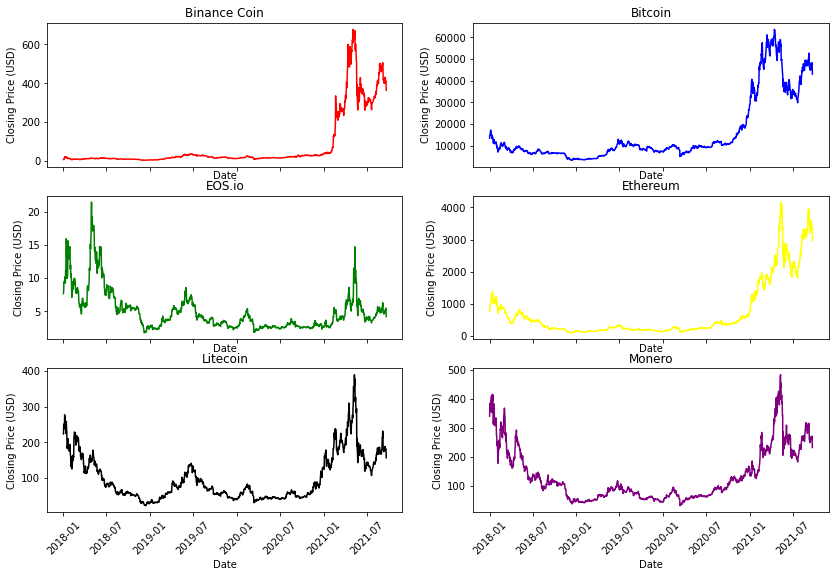

In [32]:
# visualize the close price of each cryptocurrencies
# Create the new figure and subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14,9), sharex=True)

# Rename the axes for ease of use
axs[0, 0].plot(new_BNB['Close'], color="red")
axs[0, 0].set_title('Binance Coin')
axs[0, 1].plot(new_BTC['Close'], color="blue")
axs[0, 1].set_title('Bitcoin')
axs[1, 0].plot(new_EOS['Close'], color="green")
axs[1, 0].set_title('EOS.io')
axs[1, 1].plot(new_ETH['Close'], color="yellow")
axs[1, 1].set_title('Ethereum')
axs[2, 0].plot(new_LTC['Close'], color="black")
axs[2, 0].set_title('Litecoin')
axs[2, 1].plot(new_XMR['Close'], color="purple")
axs[2, 1].set_title('Monero')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Closing Price (USD)')
    ax.tick_params(axis='x', labelrotation=45)

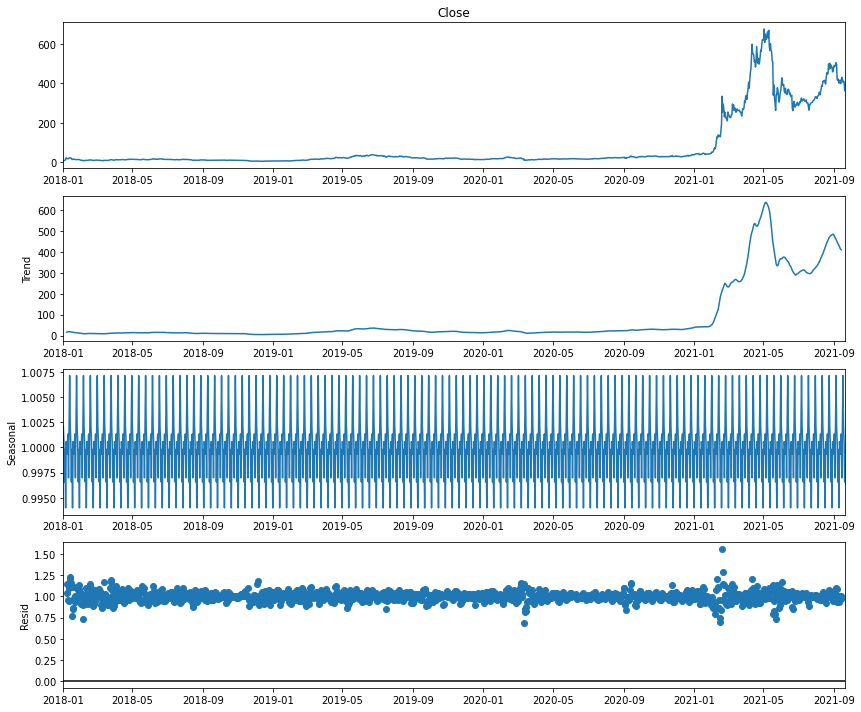

In [146]:
# Time Series Analysis
decomp = seasonal_decompose(new_BNB.Close, model='multiplicative',period=12)
fig = decomp.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.show()

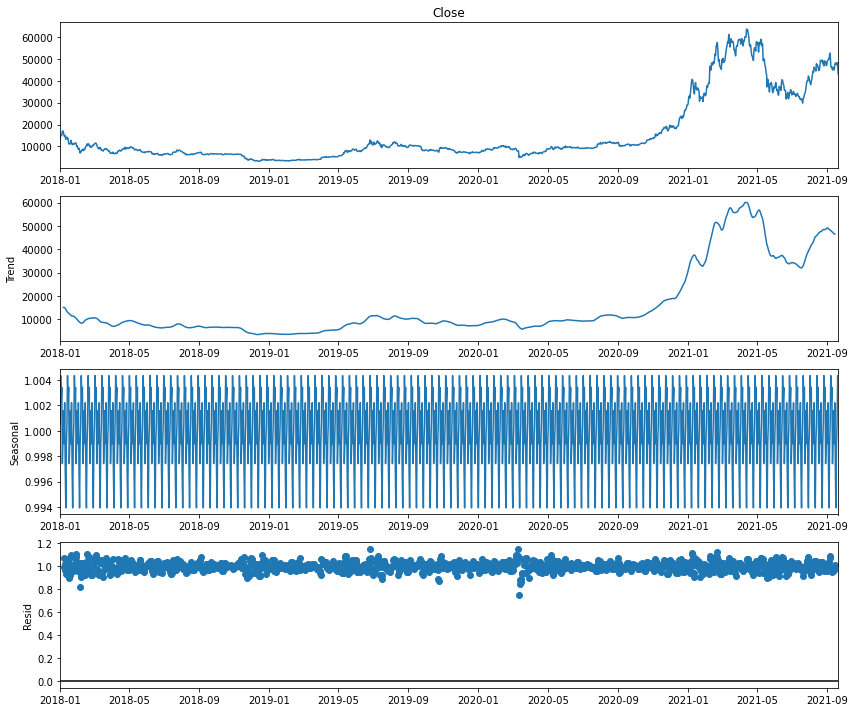

In [34]:
decomp = seasonal_decompose(new_BTC.Close, model='multiplicative',period=12)
fig = decomp.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.show()

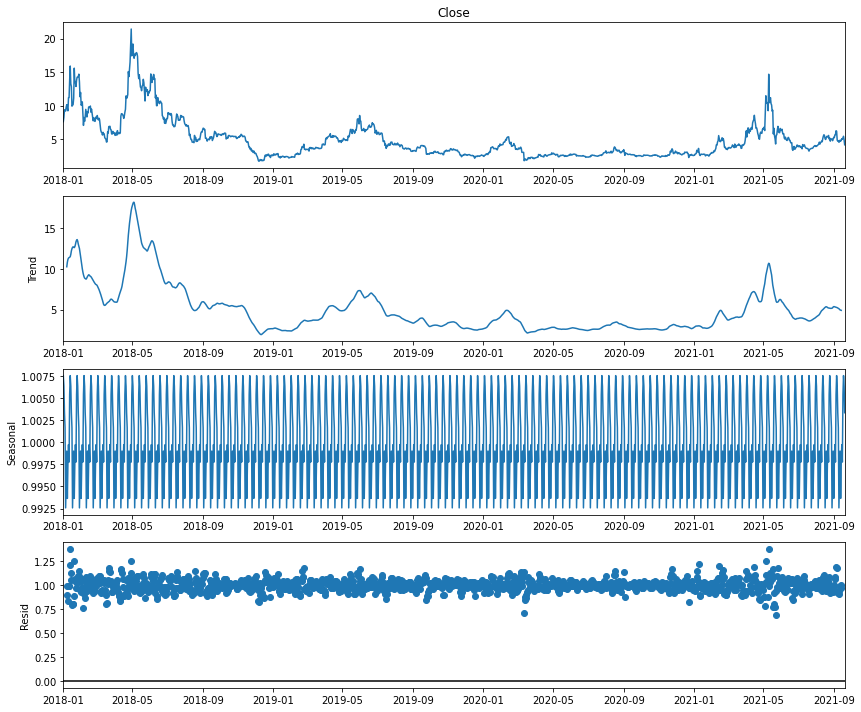

In [35]:
decomp = seasonal_decompose(new_EOS.Close, model='multiplicative',period=12)
fig = decomp.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.show()

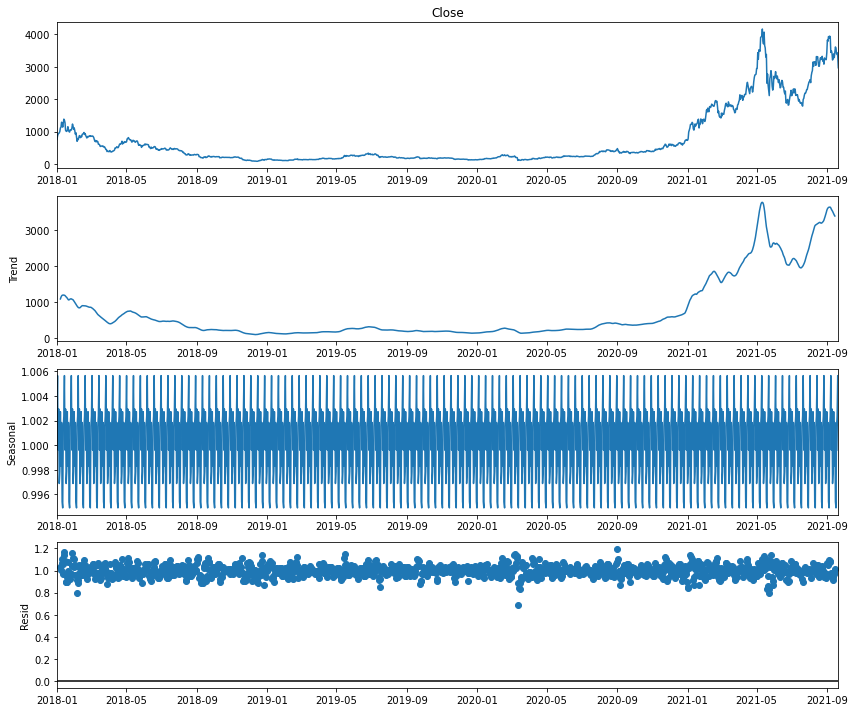

In [36]:
decomp = seasonal_decompose(new_ETH.Close, model='multiplicative',period=12)
fig = decomp.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.show()

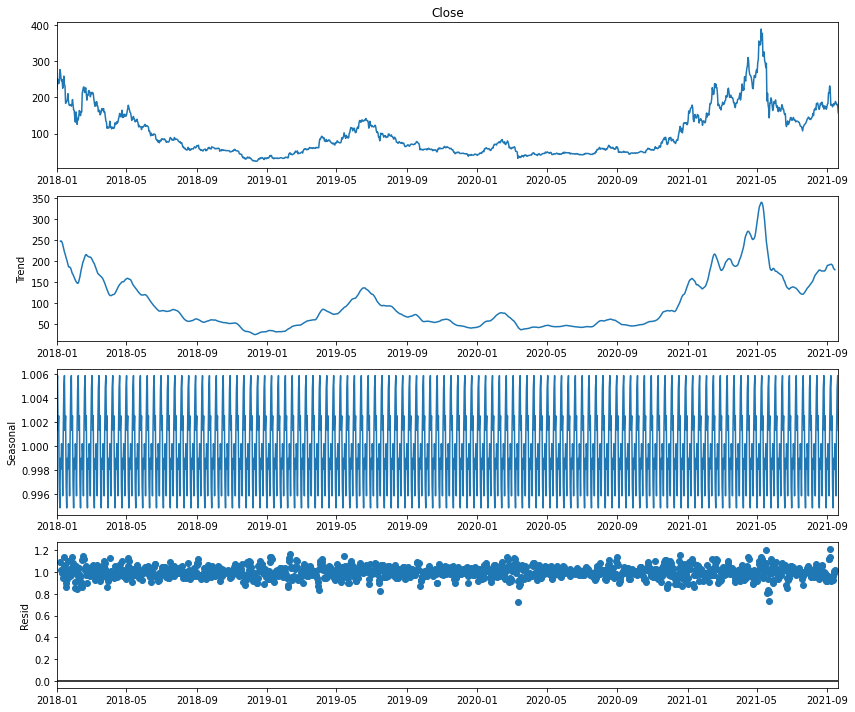

In [37]:
decomp = seasonal_decompose(new_LTC.Close, model='multiplicative',period=12)
fig = decomp.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.show()

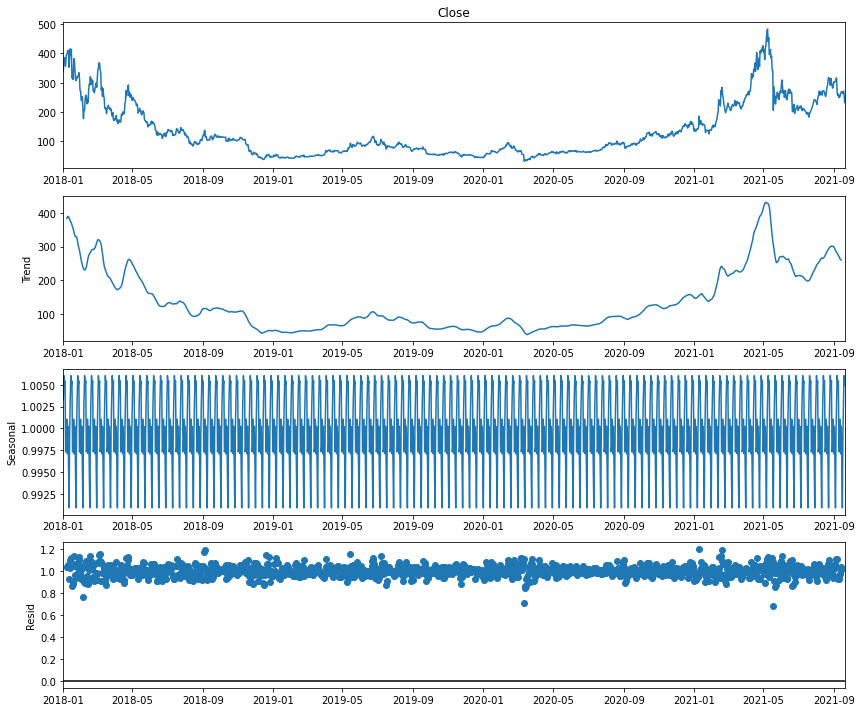

In [38]:
decomp = seasonal_decompose(new_XMR.Close, model='multiplicative',period=12)
fig = decomp.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.show()

In [ ]:
# Candlestick chart
#BNB_mini = new_BNB.iloc[-500:] # Select the last 500 minutes
#fig = go.Figure(data=[go.Candlestick(x=BNB_mini.index,
                #open=BNB_mini['Open'], high=BNB_mini['High'],
                #low=BNB_mini['Low'], close=BNB_mini['Close'])])

#fig.update_layout(xaxis_rangeslider_visible=False)
#fig.show()

In [ ]:
#BTC_mini = new_BTC.iloc[-1000:] # Select the last 1000 minutes
#fig = go.Figure(data=[go.Candlestick(x=BTC_mini.index, open=BTC_mini['Open'], high=BTC_mini['High'], low=BTC_mini['Low'], close=BTC_mini['Close'])])
#fig.update_layout(xaxis_rangeslider_visible=False)
#fig.show()

In [ ]:
#EOS_mini = new_EOS.iloc[-2000:] # Select the last 2000 minutes
#fig = go.Figure(data=[go.Candlestick(x=EOS_mini.index, open=EOS_mini['Open'], high=EOS_mini['High'], low=EOS_mini['Low'], close=EOS_mini['Close'])])
#fig.show()

In [ ]:
#ETH_mini = new_ETH.iloc[-5000:] # Select the last 5000 minutes
#fig = go.Figure(data=[go.Candlestick(x=ETH_mini.index, open=ETH_mini['Open'], high=ETH_mini['High'], low=ETH_mini['Low'], close=ETH_mini['Close'])])
#fig.show()

In [ ]:
#LTC_mini = new_LTC.iloc[-2000:] # Select the last 2000 minutes
#fig = go.Figure(data=[go.Candlestick(x=LTC_mini.index, open=LTC_mini['Open'], high=LTC_mini['High'], low=LTC_mini['Low'], close=LTC_mini['Close'])])
#fig.update_layout(xaxis_rangeslider_visible=False)
#fig.show()

In [ ]:
#XMR_mini = XMR.iloc[-1000:] # Select the last 1000 minutes
#fig = go.Figure(data=[go.Candlestick(x=XMR_mini.index, open=XMR_mini['Open'], high=XMR_mini['High'], low=XMR_mini['Low'], close=XMR_mini['Close'])])
#fig.update_layout(xaxis_rangeslider_visible=False)
#fig.show()

## Preprocessing the Data

In [112]:
# Split training and testing data for Binance Coin
BNB_train = BNB_daily_df[0:1096]# Start from 2018-01-01 to 2021-01-01
BNB_test = BNB_daily_df[1096:] # Start from 2021-01-01 to 2021-09-20
X_BNB_train = BNB_train[["High","Low","VWAP"]]
X_BNB_test = BNB_test[["High","Low","VWAP"]]
y_BNB_train = BNB_train.Close
y_BNB_test = BNB_test.Close

In [113]:
# Split training and testing data for Bitcoin
BTC_train = BTC_daily_df[0:1096]# Start from 2018-01-01 to 2021-01-01
BTC_test = BTC_daily_df[1096:] # Start from 2021-01-01 to 2021-09-20
X_BTC_train = BTC_train[["High","Low","VWAP"]]
X_BTC_test = BTC_test[["High","Low","VWAP"]]
y_BTC_train = BTC_train.Close
y_BTC_test = BTC_test.Close

In [114]:
# Split training and testing data for EOS.io
EOS_train = EOS_daily_df[0:1096]# Start from 2018-01-01 to 2021-01-01
EOS_test = EOS_daily_df[1096:] # Start from 2021-01-01 to 2021-09-20
X_EOS_train = EOS_train[["High","Low","VWAP"]]
X_EOS_test = EOS_test[["High","Low","VWAP"]]
y_EOS_train = EOS_train.Close
y_EOS_test = EOS_test.Close

In [115]:
# Split training and testing data for Ethereum
ETH_train = ETH_daily_df[0:1096]# Start from 2018-01-01 to 2021-01-01
ETH_test = ETH_daily_df[1096:] # Start from 2021-01-01 to 2021-09-20
X_ETH_train = ETH_train[["High","Low","VWAP"]]
X_ETH_test = ETH_test[["High","Low","VWAP"]]
y_ETH_train = ETH_train.Close
y_ETH_test = ETH_test.Close

In [116]:
# Split trainng and testing data for Litecoin
LTC_train = LTC_daily_df[0:1096]# Start from 2018-01-01 to 2021-01-01
LTC_test = LTC_daily_df[1096:] # Start from 2021-01-01 to 2021-09-20
X_LTC_train = LTC_train[["High","Low","VWAP"]]
X_LTC_test = LTC_test[["High","Low","VWAP"]]
y_LTC_train = LTC_train.Close
y_LTC_test = LTC_test.Close

In [117]:
# Split training and testing data for Monero
XMR_train = XMR_daily_df[0:1096]# Start from 2018-01-01 to 2021-01-01
XMR_test = XMR_daily_df[1096:] # Start from 2021-01-01 to 2021-09-20
X_XMR_train = XMR_train[["High","Low","VWAP"]]
X_XMR_test = XMR_test[["High","Low","VWAP"]]
y_XMR_train = XMR_train.Close
y_XMR_test = XMR_test.Close

## Check shape of data

In [90]:
print(f'shape of X_EOS_train : {X_LTC_train.shape}\nshape of X_EOS_test : {X_EOS_test.shape}\nshape of y_EOS_train : {y_EOS_train.shape}\nshape of y_EOS_test : {y_EOS_test.shape}')

shape of X_EOS_train : (1096, 4)
shape of X_EOS_test : (263, 4)
shape of y_EOS_train : (1096,)
shape of y_EOS_test : (263,)


## Scale the training and testing data

In [118]:
# Create a StandardScaler instances
scaler = StandardScaler()
X_BNB_scaler = scaler.fit(X_BNB_train)
X_BTC_scaler = scaler.fit(X_BTC_train)
X_EOS_scaler = scaler.fit(X_EOS_train)
X_ETH_scaler = scaler.fit(X_ETH_train)
X_LTC_scaler = scaler.fit(X_LTC_train)
X_XMR_scaler = scaler.fit(X_XMR_train)

# Scale the data for those eight cryptocurrencies
X_BNB_train_scaled = X_BNB_scaler.transform(X_BNB_train)
X_BNB_test_scaled = X_BNB_scaler.transform(X_BNB_test)

X_BTC_train_scaled = X_BTC_scaler.transform(X_BTC_train)
X_BTC_test_scaled = X_BTC_scaler.transform(X_BTC_test)

X_EOS_train_scaled = X_EOS_scaler.transform(X_EOS_train)
X_EOS_test_scaled = X_EOS_scaler.transform(X_EOS_test)

X_ETH_train_scaled = X_ETH_scaler.transform(X_ETH_train)
X_ETH_test_scaled = X_ETH_scaler.transform(X_ETH_test)

X_LTC_train_scaled = X_LTC_scaler.transform(X_LTC_train)
X_LTC_test_scaled = X_LTC_scaler.transform(X_LTC_test)

X_XMR_train_scaled = X_XMR_scaler.transform(X_XMR_train)
X_XMR_test_scaled = X_XMR_scaler.transform(X_XMR_test)

## Random Forest Regression

In [119]:
rf_model = RandomForestRegressor(n_estimators=5, min_samples_split=6, min_samples_leaf=1, max_features='auto', max_depth=110, bootstrap=True)

rf_model.fit(X_BNB_train_scaled,y_BNB_train)
y_pred_BNB = rf_model.predict(X_BNB_test_scaled)

rf_model.fit(X_BTC_train_scaled,y_BTC_train)
y_pred_BTC = rf_model.predict(X_BTC_test_scaled)

rf_model.fit(X_EOS_train_scaled,y_EOS_train)
y_pred_EOS = rf_model.predict(X_EOS_test_scaled)

rf_model.fit(X_ETH_train_scaled,y_ETH_train)
y_pred_ETH = rf_model.predict(X_ETH_test_scaled)

rf_model.fit(X_LTC_train_scaled,y_LTC_train)
y_pred_LTC = rf_model.predict(X_LTC_test_scaled)

rf_model.fit(X_XMR_train_scaled,y_XMR_train)
y_pred_XMR = rf_model.predict(X_XMR_test_scaled)

In [120]:
print(f"Test Score for Binance Coin: {r2_score(y_BNB_test,y_pred_BNB):.3f}")
print(f"Test Score for Bitcoin: {r2_score(y_BTC_test,y_pred_BTC):.3f}")
print(f"Test Score for EOS.io: {r2_score(y_EOS_test,y_pred_EOS):.3f}")
print(f"Test Score for Ethereum: {r2_score(y_ETH_test,y_pred_ETH):.3f}")
print(f"Test Score for Litecoin: {r2_score(y_LTC_test,y_pred_LTC):.3f}")
print(f"Test Score for Monero: {r2_score(y_XMR_test,y_pred_XMR):.3f}")

Test Score for Binance Coin: -3.126
Test Score for Bitcoin: -3.495
Test Score for EOS.io: 0.940
Test Score for Ethereum: -1.627
Test Score for Litecoin: 0.868
Test Score for Monero: 0.947


In [121]:
from sklearn.inspection import permutation_importance
rf_model.feature_importances_

array([0.04019637, 0.49906714, 0.46073649])

In [122]:
# View the feature scores
feature_scores = pd.Series(rf_model.feature_importances_, index=X_BNB_train.columns).sort_values(ascending=False)
feature_scores

Low     0.499067
VWAP    0.460736
High    0.040196
dtype: float64

## Artificial Neural Network

In [136]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Define the model
hidden1 = 5
hidden2 = 5
#hidden3 = 30

model = Sequential()

# Hidden layer 1
model.add(Dense(units=hidden1, input_dim=3, kernel_initializer='normal', activation="relu"))

# Hidden layer 2
model.add(Dense(units=hidden2, kernel_initializer='normal', activation="relu"))

# Hidden layer 3
#model.add(tf.keras.layers.Dense(units=hidden3, activation="relu"))

#Output layer
model.add(Dense(units=1, kernel_initializer='normal'))

# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = model.fit(X_BNB_train_scaled, y_BNB_train, epochs=50)

# Generate predictions on testing data
y_pred_model_BNB=model.predict(X_BNB_test_scaled)

Epoch 1/50
35/35 [==============================] - 2s 4ms/step - loss: 365.3776 - accuracy: 0.0000e+00
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 362.6837 - accuracy: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 356.8809 - accuracy: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 345.3911 - accuracy: 0.0000e+00
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 325.6560 - accuracy: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 296.3214 - accuracy: 0.0000e+00
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 258.2261 - accuracy: 0.0000e+00
Epoch 8/50
35/35 [==============================] - 0s 5ms/step - loss: 213.9809 - accuracy: 0.0000e+00
Epoch 9/50
35/35 [==============================] - 0s 6ms/step - loss: 169.2030 - accuracy: 0.0000e+00
Epoch 10/50
35/35 [==============================] - 0s 7ms/step

In [138]:
# Train ANN for Bitcoin
model.fit(X_BTC_train_scaled, y_BTC_train, epochs=50)

# Generate predictions on testing data
y_pred_model_BTC = model.predict(X_BTC_test_scaled)

Epoch 1/50
35/35 [==============================] - 0s 4ms/step - loss: 88132992.0000 - accuracy: 0.0000e+00
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 83511672.0000 - accuracy: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 73305824.0000 - accuracy: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 0s 6ms/step - loss: 59307552.0000 - accuracy: 0.0000e+00
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 44078284.0000 - accuracy: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 0s 8ms/step - loss: 29682946.0000 - accuracy: 0.0000e+00
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 17861496.0000 - accuracy: 0.0000e+00
Epoch 8/50
35/35 [==============================] - 0s 4ms/step - loss: 9522612.0000 - accuracy: 0.0000e+00
Epoch 9/50
35/35 [==============================] - 0s 4ms/step - loss: 4394868.5000 - accuracy: 0.0000e+00
Epoch 10/50
35/35 [==

In [139]:
# Train ANN for EOS.io
model.fit(X_EOS_train_scaled, y_EOS_train, epochs=50)

# Generate predictions on testing data
y_pred_model_EOS = model.predict(X_EOS_test_scaled)

Epoch 1/50
35/35 [==============================] - 0s 3ms/step - loss: 1853.0934 - accuracy: 0.0000e+00
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 735.5750 - accuracy: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 443.0931 - accuracy: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 317.9449 - accuracy: 0.0000e+00
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 248.7309 - accuracy: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 205.3524 - accuracy: 0.0000e+00
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 175.7563 - accuracy: 0.0000e+00
Epoch 8/50
35/35 [==============================] - 0s 4ms/step - loss: 154.7119 - accuracy: 0.0000e+00
Epoch 9/50
35/35 [==============================] - 0s 3ms/step - loss: 139.0525 - accuracy: 0.0000e+00
Epoch 10/50
35/35 [==============================] - 0s 3ms/ste

In [140]:
# Train ANN for Ethereum
model.fit(X_ETH_train_scaled, y_ETH_train, epochs=50)

# Generate predictions on testing data
y_pred_model_ETH = model.predict(X_ETH_test_scaled)

Epoch 1/50
35/35 [==============================] - 0s 4ms/step - loss: 4492.8013 - accuracy: 0.0000e+00
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 4129.4565 - accuracy: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 3463.9468 - accuracy: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 2874.5142 - accuracy: 0.0000e+00
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 2592.7207 - accuracy: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 2492.5901 - accuracy: 0.0000e+00
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 2436.2598 - accuracy: 0.0000e+00
Epoch 8/50
35/35 [==============================] - 0s 4ms/step - loss: 2388.6426 - accuracy: 0.0000e+00
Epoch 9/50
35/35 [==============================] - 0s 4ms/step - loss: 2342.1025 - accuracy: 0.0000e+00
Epoch 10/50
35/35 [==============================] - 0s

In [141]:
# Train ANN for Litecoin
model.fit(X_LTC_train_scaled, y_LTC_train, epochs=50)

# Generate predictions on testing data
y_pred_model_LTC = model.predict(X_LTC_test_scaled)

Epoch 1/50
35/35 [==============================] - 0s 3ms/step - loss: 334.2513 - accuracy: 0.0000e+00
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 243.0346 - accuracy: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 183.4626 - accuracy: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 149.6800 - accuracy: 0.0000e+00
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 130.7954 - accuracy: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 120.5656 - accuracy: 0.0000e+00
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 114.0141 - accuracy: 0.0000e+00
Epoch 8/50
35/35 [==============================] - 0s 6ms/step - loss: 109.2110 - accuracy: 0.0000e+00
Epoch 9/50
35/35 [==============================] - 0s 7ms/step - loss: 104.9691 - accuracy: 0.0000e+00
Epoch 10/50
35/35 [==============================] - 0s 8ms/step

In [142]:
# Train ANN for Monero
model.fit(X_XMR_train_scaled, y_XMR_train, epochs=50)

# Generate predictions on testing data
y_pred_model_XMR = model.predict(X_XMR_test_scaled)

Epoch 1/50
35/35 [==============================] - 0s 4ms/step - loss: 57.9374 - accuracy: 0.0000e+00
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 49.3478 - accuracy: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 45.0984 - accuracy: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 42.8136 - accuracy: 0.0000e+00
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 41.4170 - accuracy: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 40.4856 - accuracy: 0.0000e+00
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 39.7505 - accuracy: 0.0000e+00
Epoch 8/50
35/35 [==============================] - 0s 5ms/step - loss: 39.1642 - accuracy: 0.0000e+00
Epoch 9/50
35/35 [==============================] - 0s 7ms/step - loss: 38.6351 - accuracy: 0.0000e+00
Epoch 10/50
35/35 [==============================] - 0s 6ms/step - loss: 

In [143]:
print(f"Test Score for Binance Coin: {r2_score(y_BNB_test,y_pred_model_BNB):.3f}")
print(f"Test Score for Bitcoin: {r2_score(y_BTC_test,y_pred_model_BTC):.3f}")
print(f"Test Score for EOS.io: {r2_score(y_EOS_test,y_pred_model_EOS):.3f}")
print(f"Test Score for Ethereum: {r2_score(y_ETH_test,y_pred_model_ETH):.3f}")
print(f"Test Score for Litecoin: {r2_score(y_LTC_test,y_pred_model_LTC):.3f}")
print(f"Test Score for Monero: {r2_score(y_XMR_test,y_pred_model_XMR):.3f}")

Test Score for Binance Coin: -3.961
Test Score for Bitcoin: 0.981
Test Score for EOS.io: -0.371
Test Score for Ethereum: 0.980
Test Score for Litecoin: 0.954
Test Score for Monero: 0.970


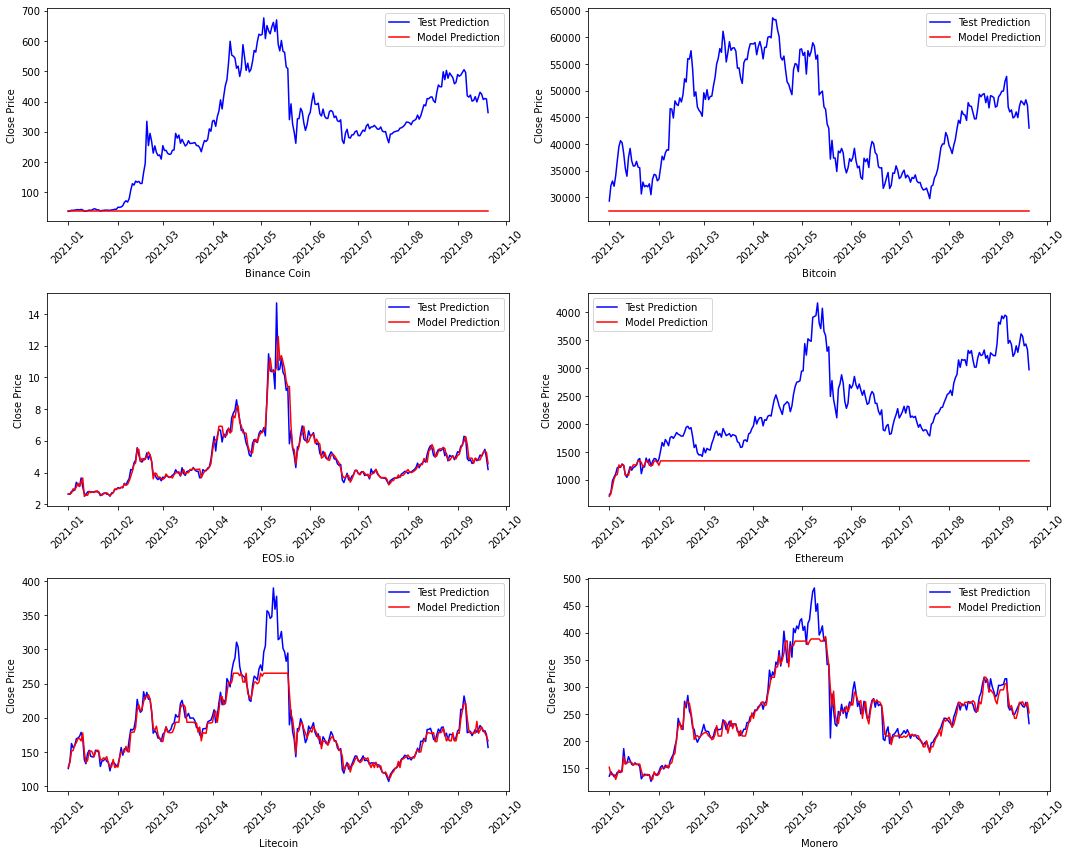

In [156]:
# Visualize the prediction of hypertuned random forest for each cryptocurrency
fig = plt.figure(figsize=(15,12))
times = BNB_test.index
fig.add_subplot(321)
plt.plot(times, y_BNB_test, 'b', label='Test Prediction')
plt.plot(times, y_pred_BNB, 'r', label='Model Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Binance Coin')
plt.ylabel('Close Price')

fig.add_subplot(322)
plt.plot(times, y_BTC_test, 'b', label='Test Prediction')
plt.plot(times, y_pred_BTC, 'r', label='Model Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Bitcoin')
plt.ylabel('Close Price')

fig.add_subplot(323)
plt.plot(times, y_EOS_test, 'b', label='Test Prediction')
plt.plot(times, y_pred_EOS, 'r', label='Model Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('EOS.io')
plt.ylabel('Close Price')

fig.add_subplot(324)
plt.plot(times, y_ETH_test, 'b', label='Test Prediction')
plt.plot(times, y_pred_ETH, 'r', label='Model Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Ethereum')
plt.ylabel('Close Price')

fig.add_subplot(325)
plt.plot(times, y_LTC_test, 'b', label='Test Prediction')
plt.plot(times, y_pred_LTC, 'r', label='Model Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Litecoin')
plt.ylabel('Close Price')

fig.add_subplot(326)
plt.plot(times, y_XMR_test, 'b', label='Test Prediction')
plt.plot(times, y_pred_XMR, 'r', label='Model Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Monero')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()

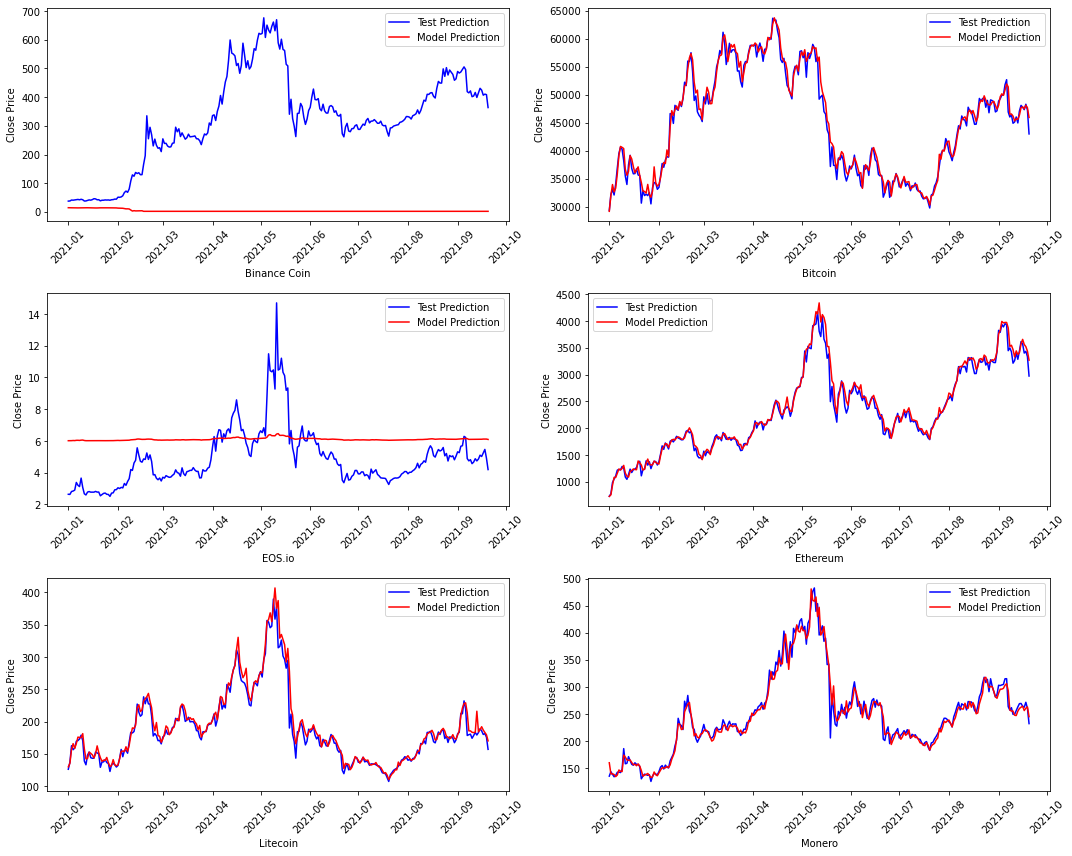

In [157]:
# Visualize the prediction of ANN random forest for each cryptocurrency
fig = plt.figure(figsize=(15,12))
times = BNB_test.index
fig.add_subplot(321)
plt.plot(times, y_BNB_test, 'b', label='Test Prediction')
plt.plot(times, y_pred_model_BNB, 'r', label='Model Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Binance Coin')
plt.ylabel('Close Price')

fig.add_subplot(322)
plt.plot(times, y_BTC_test, 'b', label='Test Prediction')
plt.plot(times, y_pred_model_BTC, 'r', label='Model Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Bitcoin')
plt.ylabel('Close Price')

fig.add_subplot(323)
plt.plot(times, y_EOS_test, 'b', label='Test Prediction')
plt.plot(times, y_pred_model_EOS, 'r', label='Model Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('EOS.io')
plt.ylabel('Close Price')

fig.add_subplot(324)
plt.plot(times, y_ETH_test, 'b', label='Test Prediction')
plt.plot(times, y_pred_model_ETH, 'r', label='Model Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Ethereum')
plt.ylabel('Close Price')

fig.add_subplot(325)
plt.plot(times, y_LTC_test, 'b', label='Test Prediction')
plt.plot(times, y_pred_model_LTC, 'r', label='Model Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Litecoin')
plt.ylabel('Close Price')

fig.add_subplot(326)
plt.plot(times, y_XMR_test, 'b', label='Test Prediction')
plt.plot(times, y_pred_model_XMR, 'r', label='Model Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Monero')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()

## Use Random Search CV to define best Hyperparameter Tuning

In [104]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [105]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf_model,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [106]:
rf_random.fit(X_BNB_train, y_BNB_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=40,
                                                   min_samples_split=6),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=42, verbose=2)

In [107]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 5, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}  



## Connect to SQL Database

In [158]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

engine = create_engine("sqlite:///crypto.sqlite")

# Reflect an existing database into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect=True)

# Save references